In [1]:
import torch
import torchvision as vision
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("../input/creditcardfraud/creditcard.csv")
df.rename(columns={'Class':'label'},inplace=True)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df=df.drop('Time',axis=1)

In [4]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
fraud=df[df.label==1]
clean=df[df.label==0]
print("# of fraud samples {}. # of clean samples {} ".format(
            len(fraud),len(clean)))

# of fraud samples 492. # of clean samples 284315 


In [6]:
TRAINING_SAMPLE=200000
VALIDATE_SIZE=0.2

In [7]:
clean=clean.sample(frac=1).reset_index(drop=True)
train_input=clean.iloc[:TRAINING_SAMPLE].drop('label',axis=1)
test_input=clean.iloc[TRAINING_SAMPLE:].append(fraud)

In [8]:
test_input.label.value_counts()

0    84315
1      492
Name: label, dtype: int64

In [9]:
test_input

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,label
200000,2.041426,0.279215,-1.726450,0.536894,0.282255,-1.435958,0.329857,-0.421844,0.452493,-0.549806,...,0.208009,0.819607,-0.028971,-0.061656,0.266606,-0.101595,0.007119,-0.026902,6.99,0
200001,1.805339,-1.145611,-1.172167,-1.201661,-0.469437,-0.217557,-0.412257,-0.114184,1.765479,-0.713890,...,0.245288,0.548724,-0.054640,0.118249,-0.157070,0.303536,-0.038866,-0.018656,169.42,0
200002,1.930111,-0.237508,-0.483750,1.045584,-0.108279,0.450845,-0.607201,0.259836,0.779454,0.336739,...,-0.155663,-0.441368,0.336801,0.187479,-0.352422,-0.964449,0.042865,-0.031688,15.00,0
200003,2.095210,-0.196551,-1.712226,0.003181,0.424627,-0.332320,-0.020643,-0.074359,0.641639,0.211061,...,0.230545,0.751512,-0.124804,-1.154101,0.311339,-0.044334,-0.026438,-0.082096,1.00,0
200004,-1.013283,0.243693,1.448316,1.197769,0.391390,0.533607,0.674735,0.128900,-0.017232,0.382421,...,-0.119695,0.097596,0.089615,-0.350626,0.179526,-0.189065,0.139009,-0.097798,71.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [10]:
train_input

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.447816,0.804242,-0.005119,0.744822,0.724035,0.247960,0.552298,-0.064661,-0.763714,0.347982,...,0.251301,-0.144960,-0.219682,0.023618,-0.994163,-1.255929,0.542929,0.234333,0.220985,4.26
1,1.035424,-0.353306,1.396471,1.038073,-1.440619,-0.596738,-0.566016,0.047187,0.947696,-0.255422,...,-0.028923,-0.027400,-0.034354,0.052722,0.958483,0.149514,0.278763,0.004398,0.041640,64.99
2,1.256753,0.363143,0.306362,0.691044,-0.358285,-1.067301,0.094935,-0.210430,0.014396,-0.286245,...,-0.072761,-0.286553,-0.820922,0.127222,0.343153,0.220937,0.094338,-0.022283,0.031031,1.79
3,-1.931570,2.365949,-2.591135,-0.848845,-0.054589,-0.235363,-0.578957,1.844350,-0.287775,-0.633609,...,-0.028113,-0.283191,-1.041386,0.202208,-0.422342,-0.092500,0.176375,0.050215,-0.032915,17.99
4,1.134854,0.082841,-0.140955,0.323120,0.164055,-0.258638,0.285300,-0.020578,-0.414739,0.052919,...,-0.030647,-0.300774,-1.009006,0.086296,-0.309181,0.206543,0.166295,-0.060931,0.000095,50.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-0.635794,0.537462,2.788134,2.606805,-0.151325,-0.058856,-0.097728,0.011363,-0.157558,0.663035,...,-0.097254,0.001218,0.279638,-0.079979,0.705611,-0.775216,-0.105357,-0.046280,-0.065046,3.80
199996,1.879759,1.120886,-1.631609,4.203475,0.855155,-0.836878,0.450928,-0.155359,-1.003388,0.319551,...,-0.232676,-0.423917,-1.241470,0.310750,-0.288076,-0.280705,-0.343328,-0.009335,0.018819,17.04
199997,-0.535278,0.679494,0.934482,-1.582172,-0.679357,-1.113179,0.180066,0.272047,-0.088939,-1.350355,...,0.088432,0.132409,0.308474,-0.093899,0.607305,0.129649,0.039933,-0.117227,-0.085790,22.45
199998,-1.198658,0.806734,1.483093,2.928094,0.129237,2.411979,-0.622014,0.758906,-0.185370,1.035608,...,-0.318930,0.261101,1.135877,0.416608,-0.927312,-1.842500,0.010255,-0.550700,0.061268,27.38


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline

#RANDOM_SEED = 42
# train // validate - no labels since they're all clean anyway
#X_train, X_validate = train_test_split(train_input, 
#                                       test_size=VALIDATE_SIZE, 
#                                       random_state=RANDOM_SEED)
#X_train=train_input
# manually splitting the labels from the test df
#X_test, y_test = test_input.drop('label', axis=1).values, test_input.label.values

#pipeline = Pipeline([('normalizer', Normalizer()),
#                     ('scaler', MinMaxScaler())])
#pipeline=Normalizer()
pipeline=MinMaxScaler()
pipeline.fit(train_input)
X_test, y_test = test_input.drop('label', axis=1), test_input.label
X_train_transformed = pipeline.transform(train_input)
#X_validate_transformed = pipeline.transform(X_validate)
X_test_transformed = pipeline.transform(X_test)


In [13]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
200000,2.041426,0.279215,-1.726450,0.536894,0.282255,-1.435958,0.329857,-0.421844,0.452493,-0.549806,...,-0.146435,0.208009,0.819607,-0.028971,-0.061656,0.266606,-0.101595,0.007119,-0.026902,6.99
200001,1.805339,-1.145611,-1.172167,-1.201661,-0.469437,-0.217557,-0.412257,-0.114184,1.765479,-0.713890,...,0.251928,0.245288,0.548724,-0.054640,0.118249,-0.157070,0.303536,-0.038866,-0.018656,169.42
200002,1.930111,-0.237508,-0.483750,1.045584,-0.108279,0.450845,-0.607201,0.259836,0.779454,0.336739,...,-0.226143,-0.155663,-0.441368,0.336801,0.187479,-0.352422,-0.964449,0.042865,-0.031688,15.00
200003,2.095210,-0.196551,-1.712226,0.003181,0.424627,-0.332320,-0.020643,-0.074359,0.641639,0.211061,...,-0.286492,0.230545,0.751512,-0.124804,-1.154101,0.311339,-0.044334,-0.026438,-0.082096,1.00
200004,-1.013283,0.243693,1.448316,1.197769,0.391390,0.533607,0.674735,0.128900,-0.017232,0.382421,...,0.048979,-0.119695,0.097596,0.089615,-0.350626,0.179526,-0.189065,0.139009,-0.097798,71.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [14]:
X_test.shape

(84807, 29)

In [15]:
from torch.utils.data import Dataset,DataLoader

In [16]:
class CustomDataset(Dataset):
    def __init__(self,data):
        #self.data=frame.to_numpy(dtype=np.float32)        
        self.data=data
    def __getitem__(self,idx):
            return torch.as_tensor(self.data[idx],dtype=torch.float32)
    
    def __len__(self):
        return len(self.data)

In [17]:
train_dataset=CustomDataset(X_train_transformed)

In [18]:
train_loader=DataLoader(train_dataset,batch_size=256)

In [19]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(in_features=29,out_features=29)
        self.fc2=nn.Linear(in_features=29,out_features=16)
        self.fc3=nn.Linear(in_features=16,out_features=8)
        self.fc4=nn.Linear(in_features=8,out_features=4)
        self.fc5=nn.Linear(in_features=4,out_features=2)
        
        self.fc6=nn.Linear(in_features=2,out_features=4)
        self.fc7=nn.Linear(in_features=4,out_features=8)
        self.fc8=nn.Linear(in_features=8,out_features=16)
        self.fc9=nn.Linear(in_features=16,out_features=29)
        self.fc10=nn.Linear(in_features=29,out_features=29)
        self.relu=nn.ELU()
    def forward(self,x):
        x=self.fc1(x)
        x=self.relu(x)
        x=self.fc2(x)
        x=self.relu(x)
        x=self.fc3(x)
        x=self.relu(x)
        x=self.fc4(x)
        x=self.relu(x)
        x=self.fc5(x)
        x=self.relu(x)
        x=self.fc6(x)
        x=self.relu(x)
        x=self.fc7(x)
        x=self.relu(x)
        x=self.fc8(x)
        x=self.relu(x)
        x=self.fc9(x)
        x=self.relu(x)
        return x
        

In [20]:
from torch.nn import MSELoss

In [21]:
from torch.optim import Adam,SGD
model=Net()
optimizer=Adam(model.parameters())
#optimizer=SGD(model.parameters(),lr=0.6)
loss_fn=MSELoss()
epochs=50
for epoch in range(epochs):
    for x in train_loader:
        optimizer.zero_grad()
        y=model(x)
        loss=loss_fn(x,y)
        loss.backward()
        optimizer.step()
    print("epoch:{} loss {}".format(epoch,loss.item()))

epoch:0 loss 0.002762729302048683
epoch:1 loss 0.0027269923593848944
epoch:2 loss 0.0024438113905489445
epoch:3 loss 0.0023406296968460083
epoch:4 loss 0.0023349160328507423
epoch:5 loss 0.002334814751520753
epoch:6 loss 0.0023345567751675844
epoch:7 loss 0.002331905299797654
epoch:8 loss 0.0022371700033545494
epoch:9 loss 0.0020514270290732384
epoch:10 loss 0.0020721887703984976
epoch:11 loss 0.0020798933692276478
epoch:12 loss 0.0020787627436220646
epoch:13 loss 0.002074392046779394
epoch:14 loss 0.0020690192468464375
epoch:15 loss 0.0020633621606975794
epoch:16 loss 0.002057797508314252
epoch:17 loss 0.002052558120340109
epoch:18 loss 0.0020475753117352724
epoch:19 loss 0.002042463980615139
epoch:20 loss 0.002036341466009617
epoch:21 loss 0.002027752110734582
epoch:22 loss 0.0020096288062632084
epoch:23 loss 0.0019900447223335505
epoch:24 loss 0.001979256747290492
epoch:25 loss 0.001971685327589512
epoch:26 loss 0.001963926712051034
epoch:27 loss 0.00195418787188828
epoch:28 loss 0.

In [22]:
#X_test_transformed =pipeline.transform(X_test)

# pass the transformed test set through the autoencoder to get the reconstructed result
reconstructions = model(torch.as_tensor(X_test_transformed,dtype=torch.float32))

In [23]:
mse = np.mean(np.power(X_test_transformed - reconstructions.detach().numpy(), 2), axis=1)

In [24]:
mse

array([0.00047046, 0.00105502, 0.00136132, ..., 0.0053421 , 0.01103147,
       0.00149678])

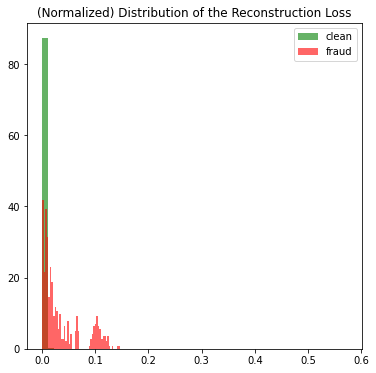

In [25]:
import matplotlib.pyplot as plt
clean = mse[y_test==0]
fraud = mse[y_test==1]

fig, ax = plt.subplots(figsize=(6,6))

ax.hist(clean, bins=50, density=True, label="clean", alpha=.6, color="green")
ax.hist(fraud, bins=50, density=True, label="fraud", alpha=.6, color="red")

plt.title("(Normalized) Distribution of the Reconstruction Loss")
plt.legend()
plt.show()

In [38]:
THRESHOLD = 7

def mad_score(points):
    """https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm """
    m = np.median(points)
    ad = np.abs(points - m)
    mad = np.median(ad)
    
    return 0.6745 * ad / mad

z_scores = mad_score(mse)
outliers = z_scores > THRESHOLD
#outliers=mse>0.007

In [39]:
print(f"Detected {np.sum(outliers):,} outliers in a total of {np.size(z_scores):,} transactions [{np.sum(outliers)/np.size(z_scores):.2%}].")

Detected 1,057 outliers in a total of 84,807 transactions [1.25%].


In [40]:
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

# get (mis)classification
cm = confusion_matrix(outliers,y_test)

# true/false positives/negatives
(tn, fn, 
 fp, tp) = cm.flatten()

In [41]:
print(f"""The classifications using the MAD method with threshold={THRESHOLD} are as follows:
{cm}

% of transactions labeled as fraud that were actual fraud(precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}""")

The classifications using the MAD method with threshold=7 are as follows:
[[83655    95]
 [  660   397]]

% of transactions labeled as fraud that were actual fraud(precision): 397/(660+397) = 37.56%
% of fraudulent transactions were caught succesfully (recall):    397/(95+397) = 80.69%
